In [1]:
import pandas as pd
data = pd.read_csv('insurance_project/insurance.csv')

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
data.shape

(1338, 7)

In [5]:
print('Number of rows',data.shape[0])
print('Number of columns',data.shape[1])

Number of rows 1338
Number of columns 7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking for null values(missing values)

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data['sex'] = data['sex'].map({'female':0, 'male':1})

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
data['smoker'] = data['smoker'].map({'no':0, 'yes':1})

In [13]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
data['region'] = data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [15]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
X = data.drop(['charges'], axis=1)

In [17]:
y = data['charges']

In [18]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [21]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


importing the model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Training the model

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

performing prediction on the test data

In [24]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test, 'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [25]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11238.162969,11001.128629
887,5272.17580,7116.295018,9492.515425,5344.044789,5840.174656
890,29330.98315,36909.013521,9648.758701,28396.775687,28001.980112
1293,9301.89355,9507.874691,9555.044136,9663.451971,9745.291602
259,33750.29180,27013.350008,9420.421978,34564.481891,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46889.388502,45431.423211
575,12222.89830,11814.555568,9625.431547,12763.683561,12465.025294
535,6067.12675,7638.107736,9504.168517,6452.802170,6974.336525
543,63770.42801,40959.081722,9605.004594,47109.611976,47862.047791


compare performance visually

In [26]:
import matplotlib.pyplot as plt

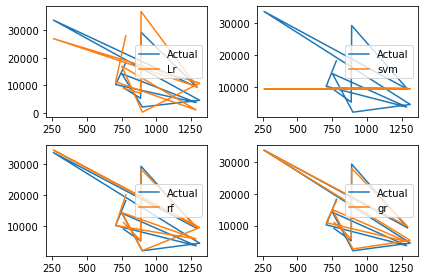

In [27]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['lr'].iloc[0:11], label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['svm'].iloc[0:11], label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['rf'].iloc[0:11], label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['gr'].iloc[0:11], label='gr')

plt.tight_layout()

plt.legend()

Evaluating the algorithm to ascertain goodness of fit

In [28]:
from sklearn import metrics

In [29]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [30]:
print(score1,score2,score3,score4)

0.7833463107364538 -0.07229762787861826 0.8671109102757427 0.877993618163719


In [31]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [32]:
print(s1,s2,s3,s4)

4186.5088983664355 8592.428727899724 2496.92050060168 2447.167158715136


In [33]:
data = {'age':40,
         'sex':1,
           'bmi':40.30,
            'children':4,
              'smoker':1,
               'region':2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [34]:
new_pred= gr.predict(df)
print (new_pred)

[43013.23345491]


Train the entire dataset with our best performing model(gr)

In [35]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

saving our model using joblib lib.

In [36]:
import joblib

In [37]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

To test the model (make prediction with the model trained with the whole dataset)

In [38]:
model = joblib.load('model_joblib_gr')

In [39]:
model.predict(df)

array([42148.361888])

Creating a GUI

In [40]:
from tkinter import *

In [41]:
import joblib

In [43]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text = "Insurance cost").grid(row=7)
    Label(master,text =result).grid(row=8)




master=Tk()
master.title("Health Insurance Cost Predictor")
label = Label(master,text="Health Insurance Cost Predictor",bg="black",
               fg="white").grid(row=0,columnspan=2)


Label(master,text = "Enter your age").grid(row=1)
Label(master,text = "Male or Female [1/0]").grid(row=2)
Label(master,text = "Enter your BMI value").grid(row=3)
Label(master,text = "Enter number of children").grid(row=4)
Label(master,text = "smoker yes/no [1/0]").grid(row=5)
Label(master,text = "region [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
      
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text ="predict", command=show_entry).grid()
      




mainloop()